## 神经网络 Neural Networks

> **神经网络是由具有适应性的简单单元组成的广泛并行互联的网络，他的组织能够模拟生物神经系统对真实世界物体所作出的交互反应 -- Kohonen 1988**

### 神经元模型

1943年 McCulloch and Pitts根据细胞神经元的激活机制，提出**M-P神经元模型**。其中n输入各有不同的权重w，组合后通过**激活函数activation function**处理并输出。

<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/5_1.png?raw=true' width='500' align='center'>

激活函数有许多选择，最直观的是二分类情况（如下图左），但其不光滑不连续，更多的是使用**Sigmoid函数**，也称**挤压函数squashing function**:

<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/5_2.png?raw=true' width='500' align='center'>

通过层次结构连接神经元，就得到了神经网络。数学上可视为一个包含了许多参数的的若干个函数模型的嵌套组合。[更多的激活函数](https://www.jianshu.com/p/22d9720dbf1a)

### 感知机与多层网络 

Perceptron,由两层神经元组成，输入层接受信号传递给输出层，亦成为**阈值逻辑单元 threshold logic unit**

<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/5_3.png?raw=true' width='500' align='center'>

由感知机使用线性加权以及sigmoid函数，故权重可以通过梯度进行学习：

$$w_i = w_i + \eta (y-\hat y) x_i$$

但是需要注意分类过程中，虽然对于线性可分情况，存在超平面分开可以证明参数最终收敛，但是不满足时则参数会不断震荡。要解决非线性可分问题，考虑使用多层神经元，其中输入与输出之间的神经元成为**隐含层 hidden layer**：

<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/5_5.png?raw=true' width='500' align='center'>

对于神经网络，如果不存在同层连接或是跨层的，称之为**多层前馈神经网络 multi-layer feedforward NN**, 神经网络的学习就是不断调整神经元之间的*连接权*和每个神经元的*阈值*。

<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/5_6.png?raw=true' width='500' align='center'>

### 误差逆传播算法 error BackPropagation BP

给定训练集$D=\{(x_1,y_1),\dots, (x_m,y_m)\}$,其中$x_i\in R^d. y_i\in R^l$,具体设置如下：

<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/5_7.png?raw=true' width='500' align='center'>


类似于感知机的参数更新，BP算法基于梯度下降，以目标的负梯度方向对参数进行调整:$v = v+ \Delta v$. 设对第k个样例输出估计为$\hat y_j^k=f(\beta_j-\theta_j)$,也即均方误差$E_k=\frac{1}{2}\sum_{j=1}^l(\hat{y}_j^k - y_j^k)^2$. 
在给定学习率$\eta$, 根据链式法则及sigmoid函数求导，参数$w$的负梯度为

$$\frac{\partial E_k}{\partial w_{hj}} = \frac{\partial E_k}{\partial \hat{y}_j^k} \frac{\partial \hat{y}_j^k}{\partial \beta_j} \frac{\partial \beta_j}{\partial w_{hj}} = 
\hat{y}_j^k (1-\hat{y}_j^k) (\hat{y}_j^k - y_j^k) b_h $$

则

$$\Delta w_{hj}=-\eta \frac{\partial E_k}{\partial w_{hj}} = \eta \hat{y}_j^k (1-\hat{y}_j^k) (y_j^k -\hat{y}_j^k - ) b_h $$

其他参数可以类似的得到，不同的参数可以使用不同的学习速率$\eta$.

<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/5_8.png?raw=true' width='500' align='center'>

上述过程中给出的是单个样例的误差，**标准BP算法**；当误差为累积误差最小时，得到**累积误差逆传播算法，累积BP**，都很常用。一般来说标准BP参数更新频繁，迭代次数多。而累积BP更新频率低，并且到下降到一程度后变缓慢，此时可以改用标准BP算法可以更快优化，尤其是大数据时。

> 只需一个包含足够多神经元的隐层，多层前馈网络就能一人一精度逼近人以复杂读的连续函数 -- Hornik et al. 1989 但实际通过**试错法 trial-by-error**进行尝试。

- **过拟合**
  - 早停 early stopping, 训练集误差降低单测试集升高即停；
  - 正则化 regularization, 在目标函数中增加一个描述网络复杂度的部分，类似回归正则化。
  
### 全局最小与局部最小

上述过程即对权重以及阈值的参数寻优过程，自然面对[局部或是全局最优问题](https://www.cnblogs.com/neopenx/p/5621840.html), [局部最优则梯度为0，使得更新量为0而停止更新](https://www.jiqizhixin.com/articles/2019-02-10)。

<img src='./figures/5_10.png' width='500' align='center'>

> 当有多个局部最小时，如何**跳出局部最小而接近全局最小**,启发式：
 - 多组不同的初始值；
 - **模拟退火** simulated annealing技术，以一定的概率接受比当前更差的结果，使得算法能够跳出局部最小[1](https://blog.csdn.net/whyymlm/article/details/75055023),[2](https://vlight.me/2018/06/08/Simulated-Annealing/),[3](https://zhuanlan.zhihu.com/p/29390935)
 - **随机梯度下降**，计算梯度时加入随机因素 ？ 
 - **遗传算法** genetic algorithm.
 

### 其他常见神经网络


- RBF网络
  - **Radial Basis Function,径向基函数** (Broomhead and Lowe 1988), 一种单隐层前馈神经网络，使用径向基函数作为激活函数，输出层为隐含层的线性组合。

- ART网络
  - **competitive learning,竞争型学习**，采用常用的无监督学习策略，网络的输出神经元相互竞争，每一时刻仅有一个获胜神经元被激活，**winner-take-all胜者通吃**原则。
  - **Adaptive Resonance Theory,ART 自适应谐振理论**，是竞争学习的重要代表，由比较层、识别层、识别阈值和重置模块构成,详见[1](https://blog.csdn.net/pmt123456/article/details/52612683),[2](https://www.cnblogs.com/lyu0709/p/7240552.html)。 
  - ART比较好的缓解了竞争学习中的‘可塑性-稳定性窘境’，*可塑性是指神经网络要学习新知识的能力*，*稳定性是指学习新知识时要保持对就知识的记忆*。为此ART可以进行**增量学习，incremental learning**或是**在线学习，online learning**.

<img src='https://gss0.bdstatic.com/94o3dSag_xI4khGkpoWK1HF6hhy/baike/c0%3Dbaike80%2C5%2C5%2C80%2C26/sign=99cf72b39682d158af8f51e3e16372bd/2f738bd4b31c8701e94d46bb2d7f9e2f0608fff0.jpg' width='500' align='center'>

- SOM 网络 
  - **Self-Organizing Map,自组织映射**（Kohonen 1982），是一种竞争学习型的无监督神经网络，其将高维数据映射到低维空间（常二维），同时保持输入数据在高维空间的拓扑结构，即相似的样本点映射到网络输出层的邻近的神经元。
  - 训练过程：接受样本到每个输出神经元，计算样本与权向量之间的距离，最近的获胜即**最佳匹配单元best matching unit**，并更新其邻近神经元的权向量，使得这些权向量与输入样本距离缩小，迭代至收敛。
  
<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/5_11.png?raw=true' width='500' align='center'>
  
- 级联相关网络
  - **Cascade-Correlation**网络，（Fahlman and Lebiere 1990），是结构自适应网络的重要代表。一般的网络模型通常给定网络结构来训练权重与阈值。结构自适应则也会训练网络的结构，并找到最符合数据特点的结构。由于无需设置网络层数与隐含神经元数据，训练速度快但是容易在小数据过拟合。
    - 级联，建立层次连接的层级结构：从最小拓扑结构到逐渐加入隐含层，输入端连接权值是冻结固定的？
    - 相关，最大化新神经元的输入与网络误差之间的相关性训练参数。

<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/5_12.png?raw=true' width='500' align='center'>

- Elman网络
  - **递归神经网络，Recurrent Neural Network RNN**,相较于前馈神经网络，允许环形结构，从而让一部分的输出反馈回来作为输入信号，也即使得t时刻的输入状态不仅与t本身的输入有关，还与t-1时刻的网络有关，从而处理与时间有关的动态变化。
  - Elman网络是RNN的常用之一（如下图示）,隐含层神经元一般采用Sigmoid函数，并用BP算法训练。
  
<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/5_13.png?raw=true' width='500' align='center'>

- Boltzmann机
  - **基于能力的模型energy-based model**，能量最小化时网络达到理想状态。如图示，神经元分为*显层*与*隐层*，分别表示数据的输入与输出和数据的内在表达。Boltzmann机中神经元都是布尔型，定义某个状态向量的能力为：
  
$$E(\mathbf s)=-\sum_{i=1}^{n-1}\sum_{j=i+1}^n w_{ij}s_is_j-\sum_{i=1}^n\theta_is_i$$

  若网络中的神经元以任意不依赖输入值的顺序进行更新，网络最终将达到Boltzmann分布，此时状态向量s出现的概率确定为
$$P(\mathbf s)=\frac{e^{-E(\mathbf s)}}{\sum_t e^{-E(\mathbf s)}}$$
   Boltzmann机的训练过程就是将每个样例视为状态向量，使其出现的概率尽可能的大。标准的Boltzmann机是一个全连接图，训练复杂度高；故现实中常采用**受限Boltzmann机 Restricted Boltzmann Machine RBM**，即仅保留显层与隐层之间的连接，从而将Boltzmann及结构由完全图简化为二部图。
  - RBM常采用**对比散度，Contrastive Divergence，CD算法**训练。
  
<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/5_14.png?raw=true' width='500' align='center'>

<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/5_14_1.png?raw=true' width='500' align='center'>

### 深度学习 Deep Learning

*典型的深度学习模型就是很深层的神经网络。*理论上，参数越多的模型复杂度越高，容量越大，意味着能够完成更加复杂的任务。但一般情形下，复杂模型训练效率低，易过拟合。随着云计算、大数据计算能力的提升可以缓解训练低效性，数据大幅增加可以降低过拟合。*多隐层神经网络难以直接用经典算法训练，因为误差在多隐层逆传播时，往往会发散diverge而不能收敛到稳定状态。*

- **无监督逐层训练 unsupervised layer-wise training**，基本思想：每次训练一层隐结点，训练时将上一层隐层结点的输出作为输入，而本层隐结点的输出作为下一层隐结点的输入--**预训练 pre-training**；在训练全部完成后，在对整个网络进行**微调 fine-tuning**，例如**深度信念网络，deep belief network DBN**每一层都是受限Boltzmann机，首先训练第一层，标准的RBM训练，然后将训练好的隐结点视为第二层的输入结点；.....,各层训练完后，在利用BP算法对整个网络进行训练。

> 节省训练开销：
  - **预训练+微调** 可以看做是将大量参数分组，先每组找到局部比较好的设置，然后联合局部较优的结果一起训练全局最优。
  - **权共享 weight sharing**， 让一组神经元使用相同的连接权，如**卷积神经网络 Convolutional Neural Network CNN**。
  
<img src='https://github.com/ZRChao/Book-reading/blob/master/周志华西瓜书/figures/5_15.png?raw=true' width='500' align='center'>  

### 阅读材料



参考

1. https://www.cnblogs.com/NeilZhang/p/8454890.html
2. https://www.cnblogs.com/NeilZhang/p/9347233.html
3. 微软提出高分辨率深度神经网络HRNet https://mp.weixin.qq.com/s/slJCZYXhTPuXau0HzxgzYw

4. 从神经元到BERT https://mp.weixin.qq.com/s/wrqxuMidw7HvgTVUvTBGng

### 拓展

[wasserstein 距离的问题?](https://en.wikipedia.org/wiki/Wasserstein_metric)

KL离散度KL却blow up了 参考 https://www.zhihu.com/question/41752299

吴恩达实例 https://www.apdaga.com/2018/10/coursera-neural-networks-and-deep-learning-week-4A.html


Automatically created module for IPython interactive environment
Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


/Users/zhouchao/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.986800
Test set score: 0.970000


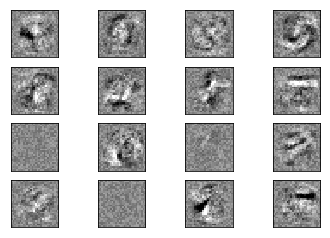

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()